In [70]:
import pandas as pd
from pandas import Series,DataFrame
from os import getcwd
import numpy as np
from itertools import zip_longest
from functools import reduce

In [2]:
linksCSV = getcwd() + "\\resources\\links.csv"
moviesCSV = getcwd() + "\\resources\\movies.csv"
ratingsCSV = getcwd() + "\\resources\\ratings.csv"
tagsCSV = getcwd() + "\\resources\\tags.csv"

In [3]:
links = pd.read_csv(linksCSV)
movies = pd.read_csv(moviesCSV)
ratings = pd.read_csv(ratingsCSV)
tags = pd.read_csv(tagsCSV)

In [4]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [8]:
genres = movies[["genres"]]
genres

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy
...,...
9737,Action|Animation|Comedy|Fantasy
9738,Animation|Comedy|Fantasy
9739,Drama
9740,Action|Animation


In [9]:
genresSr = Series([x.split('|') for x in genres.genres])
genresSr

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Length: 9742, dtype: object

In [10]:
s = set()
for row in genresSr:
    s=s.union(row)
list_genres = list(s)
list_genres

['Mystery',
 'Animation',
 'Crime',
 'Action',
 'War',
 'Romance',
 '(no genres listed)',
 'Children',
 'Drama',
 'Comedy',
 'Western',
 'Musical',
 'Film-Noir',
 'IMAX',
 'Thriller',
 'Horror',
 'Documentary',
 'Adventure',
 'Fantasy',
 'Sci-Fi']

In [11]:
movgen = movies[["movieId","genres"]]
movgen

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
...,...,...
9737,193581,Action|Animation|Comedy|Fantasy
9738,193583,Animation|Comedy|Fantasy
9739,193585,Drama
9740,193587,Action|Animation


In [33]:
genres_matches = [movgen["genres"].str.extractall('(' + x + ')') for x in list_genres]
genres_matches

[                  0
      match         
 21   0      Mystery
 28   0      Mystery
 31   0      Mystery
 43   0      Mystery
 46   0      Mystery
 ...             ...
 9668 0      Mystery
 9674 0      Mystery
 9678 0      Mystery
 9682 0      Mystery
 9689 0      Mystery
 
 [573 rows x 1 columns],
                     0
      match           
 0    0      Animation
 12   0      Animation
 44   0      Animation
 205  0      Animation
 272  0      Animation
 ...               ...
 9733 0      Animation
 9735 0      Animation
 9737 0      Animation
 9738 0      Animation
 9740 0      Animation
 
 [611 rows x 1 columns],
                 0
      match       
 5    0      Crime
 15   0      Crime
 19   0      Crime
 20   0      Crime
 21   0      Crime
 ...           ...
 9696 0      Crime
 9702 0      Crime
 9714 0      Crime
 9721 0      Crime
 9723 0      Crime
 
 [1199 rows x 1 columns],
                  0
      match        
 5    0      Action
 8    0      Action
 9    0      Action

In [13]:
genres_df_t = DataFrame(map(list, zip_longest(*[[movgen["movieId"][a] for a,b in x.index.values] for x in genres_matches])),columns=list_genres)
genres_df_t

,Mystery,Animation,Crime,Action,War,Romance,(no genres listed),Children,Drama,Comedy,Western,Musical,Film-Noir,IMAX,Thriller,Horror,Documentary,Adventure,Fantasy,Sci-Fi
0,22.0,1.0,6.0,6.0,41.0,3.0,114335.0,1.0,4,1.0,163.0,48.0,164.0,150.0,6.0,12.0,77.0,1.0,1.0,24.0
1,29.0,13.0,16.0,9.0,73.0,4.0,122888.0,2.0,11,3.0,210.0,107.0,320.0,364.0,10.0,22.0,99.0,2.0,2.0,29.0
2,32.0,48.0,20.0,10.0,110.0,7.0,122896.0,8.0,14,4.0,266.0,199.0,347.0,595.0,20.0,70.0,108.0,8.0,29.0,32.0
3,47.0,239.0,21.0,15.0,151.0,11.0,129250.0,13.0,16,5.0,303.0,242.0,913.0,1797.0,21.0,92.0,116.0,10.0,44.0,66.0
4,50.0,313.0,22.0,20.0,155.0,15.0,132084.0,27.0,17,7.0,368.0,346.0,922.0,3159.0,22.0,93.0,128.0,13.0,60.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
genres_df = DataFrame([[movgen["movieId"][a] for a,b in x.index.values] for x in genres_matches],index=list_genres)
genres_df

,0,1,2,3,4,5,6,7,8,9,...,4351,4352,4353,4354,4355,4356,4357,4358,4359,4360
Mystery,22,29,32,47,50,103,113,123,159,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animation,1,13,48,239,313,364,551,558,588,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime,6,16,20,21,22,23,30,36,42,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action,6,9,10,15,20,23,42,44,66,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
War,41,73,110,151,155,157,161,214,266,336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Romance,3,4,7,11,15,17,25,28,39,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(no genres listed),114335,122888,122896,129250,132084,134861,141131,141866,142456,143410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Children,1,2,8,13,27,34,38,48,54,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,4,11,14,16,17,20,22,24,25,26,...,187031.0,188675.0,189043.0,189713.0,190207.0,190213.0,190215.0,193567.0,193571.0,193585.0
Comedy,1,3,4,5,7,11,12,18,19,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
genres_count = genres_df_t.count().sort_values()
genres_count

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

<AxesSubplot:>

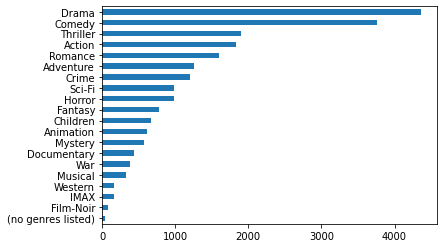

In [16]:
genres_count.plot(kind='barh',rot=0)

In [17]:
thrillers = Series(genres_df_t["Thriller"].dropna().astype(int))
thrillers

0            6
1           10
2           20
3           21
4           22
         ...  
1889    185033
1890    187031
1891    189333
1892    189381
1893    190183
Name: Thriller, Length: 1894, dtype: int32

In [18]:
rating_id = ratings[["movieId","rating"]]
rating_id

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
100831,166534,4.0
100832,168248,5.0
100833,168250,5.0
100834,168252,5.0


In [19]:
rating_genres = rating_id.merge(thrillers,left_on='movieId',right_on='Thriller')
del rating_genres["Thriller"]
rating_genres_titles = rating_genres.merge(movies[["movieId","title"]],on='movieId')
rating_genres_titles

,movieId,rating,title
0,6,4.0,Heat (1995)
1,6,4.0,Heat (1995)
2,6,5.0,Heat (1995)
3,6,4.0,Heat (1995)
4,6,4.0,Heat (1995)
...,...,...,...
26447,145951,0.5,Bloodsport: The Dark Kumite (1999)
26448,158721,3.5,Gen-X Cops (1999)
26449,160341,2.5,Bloodmoon (1997)
26450,160836,3.0,Hazard (2005)


In [20]:
mean_rating_thrillers = rating_genres_titles.groupby(['movieId','title']).mean()
mean_rating_thrillers

,,rating
movieId,title,
6,Heat (1995),3.946078
10,GoldenEye (1995),3.496212
20,Money Train (1995),2.500000
21,Get Shorty (1995),3.494382
22,Copycat (1995),3.222222
...,...,...
185033,I Kill Giants (2018),2.000000
187031,Jurassic World: Fallen Kingdom (2018),3.250000
189333,Mission: Impossible - Fallout (2018),3.750000


In [21]:
mean_rating_thrillergenre = float(mean_rating_thrillers.mean())
mean_rating_thrillergenre

3.1561160994630217

In [22]:
best_ranked_thrillers = mean_rating_thrillers[mean_rating_thrillers.rating == float(mean_rating_thrillers.max())]
best_ranked_thrillers

,,rating
movieId,title,
496,What Happened Was... (1994),5.0
876,Supercop 2 (Project S) (Chao ji ji hua) (1993),5.0
1631,"Assignment, The (1997)",5.0
5416,Cherish (2002),5.0
6021,"American Friend, The (Amerikanische Freund, Der) (1977)",5.0
6086,"I, the Jury (1982)",5.0
27704,Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003),5.0
27751,'Salem's Lot (2004),5.0
53280,"Breed, The (2006)",5.0


In [23]:
worst_ranked_thrillers = mean_rating_thrillers[mean_rating_thrillers.rating == float(mean_rating_thrillers.min())]
worst_ranked_thrillers

,,rating
movieId,title,
5105,Don't Look Now (1973),0.5
5771,My Bloody Valentine (1981),0.5
7114,"Collector, The (1965)",0.5
7636,Raising Cain (1992),0.5
8772,"Spy Who Came in from the Cold, The (1965)",0.5
31424,Alone in the Dark (2005),0.5
54274,I Know Who Killed Me (2007),0.5
61818,"Crow, The: Wicked Prayer (2005)",0.5
65350,"General Died at Dawn, The (1936)",0.5


In [133]:
genres_movie_data = [[[x.values[0][0],movgen["movieId"][a]] for a,b in x.index.values] for x in genres_matches]
genres_movie_df = DataFrame(reduce(lambda x, y: x + y, genres_movie_data),columns=["genre","movieId"])
genres_movie_df.sort_values(by="movieId")

,genre,movieId
573,Animation,1
19062,Adventure,1
11248,Comedy,1
6223,Children,1
20325,Fantasy,1
...,...,...
1182,Animation,193583
11247,Drama,193585
1183,Animation,193587
4210,Action,193587


In [134]:
genres_movie_df[genres_movie_df["movieId"]==1]

,genre,movieId
573,Animation,1
6223,Children,1
11248,Comedy,1
19062,Adventure,1
20325,Fantasy,1


In [139]:
genres_ratings = pd.merge(genres_movie_df,ratings)
genres_ratings

,genre,movieId,userId,rating,timestamp
0,Mystery,22,6,5.0,845553875
1,Mystery,22,42,5.0,996219167
2,Mystery,22,58,3.0,847719108
3,Mystery,22,64,3.5,1161559916
4,Mystery,22,91,3.5,1112712292
...,...,...,...,...,...
274475,Sci-Fi,176371,515,5.0,1513602051
274476,Sci-Fi,176371,567,5.0,1525282063
274477,Sci-Fi,176371,586,2.5,1529899177
274478,Sci-Fi,176371,599,3.5,1508605770


In [159]:
mean_ratings = genres_ratings.pivot_table('rating',index='genre',aggfunc='mean')
mean_ratings.sort_values(by="rating",ascending=False)

,rating
genre,
Film-Noir,3.920115
War,3.808294
Documentary,3.797785
Crime,3.658294
Drama,3.656184
Mystery,3.632460
Animation,3.629937
IMAX,3.618335
Western,3.583938


In [179]:
mean_ratings_user = genres_ratings.pivot_table('rating',index='genre',columns='userId',aggfunc='mean')
mean_ratings_user

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
genre,,,,,,,,,,,,,,,,,,,,,
Action,4.322222,3.954545,3.571429,3.320000,3.111111,3.609375,3.257812,3.333333,3.125000,3.500000,...,4.364865,3.571429,3.176471,3.625000,3.224638,3.178808,3.722222,3.330325,3.090909,3.600580
Adventure,4.388235,4.166667,2.727273,3.655172,3.250000,3.893617,3.314815,3.545455,3.800000,3.580645,...,4.437500,3.206897,3.058824,3.631579,3.264151,3.503401,3.466667,3.220994,3.200000,3.705993
Animation,4.689655,NaN,0.500000,4.000000,4.333333,4.071429,3.392857,5.000000,4.000000,3.866667,...,4.571429,4.000000,2.250000,3.428571,2.942308,3.714286,3.333333,3.118182,3.000000,3.901515
Children,4.547619,NaN,0.500000,3.800000,4.111111,3.617021,3.200000,4.250000,4.000000,3.607143,...,4.555556,3.000000,3.125000,3.615385,3.207547,3.448980,3.421053,2.460227,3.000000,3.651786
Comedy,4.277108,4.000000,1.000000,3.509615,3.466667,3.370079,3.163265,3.208333,3.666667,3.265823,...,4.350000,3.300000,3.304615,3.241379,3.258427,3.565321,3.327273,2.736620,3.285714,3.731144
Crime,4.355556,3.800000,0.500000,3.814815,3.833333,3.285714,3.307692,3.888889,3.142857,3.115385,...,4.558824,3.714286,3.743056,3.631579,3.045455,3.654135,3.814815,3.613014,3.500000,3.800366
Documentary,NaN,4.333333,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.000000,3.857143,NaN,3.000000,3.800000,NaN,3.000000,3.000000,4.200000
Drama,4.529412,3.882353,0.750000,3.483333,3.800000,3.614286,3.131579,3.789474,3.428571,3.152778,...,4.428571,3.294118,3.609982,3.487179,3.118644,3.787966,4.012195,3.437500,3.368421,3.874739
Fantasy,4.297872,NaN,3.375000,3.684211,4.142857,3.538462,3.065217,3.250000,5.000000,3.441176,...,4.526316,3.714286,3.553191,3.416667,3.152174,3.597938,3.571429,3.000000,3.000000,3.592715


In [162]:
movies_ratings = pd.merge(movies,ratings)
user_num_ratings = movies_ratings.groupby('userId').size()
user_num_ratings

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Length: 610, dtype: int64

In [167]:
user_more_than_100_ratings = user_num_ratings.index[user_num_ratings >= 100]

In [182]:
mean_ratings_user[user_more_than_100_ratings]

userId,1,4,6,7,10,15,17,18,19,20,...,600,601,602,603,604,605,606,607,608,610
genre,,,,,,,,,,,,,,,,,,,,,
Action,4.322222,3.320000,3.609375,3.257812,3.500000,3.203390,4.230769,3.588517,2.726667,2.755319,...,2.659091,4.364865,3.571429,3.176471,3.625000,3.224638,3.178808,3.722222,3.330325,3.600580
Adventure,4.388235,3.655172,3.893617,3.314815,3.580645,3.342105,4.285714,3.633803,2.815287,3.441860,...,3.170968,4.437500,3.206897,3.058824,3.631579,3.264151,3.503401,3.466667,3.220994,3.705993
Animation,4.689655,4.000000,4.071429,3.392857,3.866667,2.954545,4.400000,3.758065,2.937500,4.184615,...,3.217742,4.571429,4.000000,2.250000,3.428571,2.942308,3.714286,3.333333,3.118182,3.901515
Children,4.547619,3.800000,3.617021,3.200000,3.607143,2.690476,4.214286,3.542857,2.696078,3.909910,...,2.965217,4.555556,3.000000,3.125000,3.615385,3.207547,3.448980,3.421053,2.460227,3.651786
Comedy,4.277108,3.509615,3.370079,3.163265,3.265823,3.357143,4.157895,3.506757,2.640212,3.671429,...,3.065274,4.350000,3.300000,3.304615,3.241379,3.258427,3.565321,3.327273,2.736620,3.731144
Crime,4.355556,3.814815,3.285714,3.307692,3.115385,3.578947,4.250000,3.934783,2.902778,3.240000,...,2.896104,4.558824,3.714286,3.743056,3.631579,3.045455,3.654135,3.814815,3.613014,3.800366
Documentary,NaN,4.000000,NaN,NaN,NaN,NaN,3.500000,3.944444,NaN,3.750000,...,3.833333,4.000000,3.000000,3.857143,NaN,3.000000,3.800000,NaN,3.000000,4.200000
Drama,4.529412,3.483333,3.614286,3.131579,3.152778,3.740741,4.186275,3.894495,2.609272,3.809859,...,2.944805,4.428571,3.294118,3.609982,3.487179,3.118644,3.787966,4.012195,3.437500,3.874739
Fantasy,4.297872,3.684211,3.538462,3.065217,3.441176,2.906250,4.323529,3.644231,2.833333,3.864583,...,3.511905,4.526316,3.714286,3.553191,3.416667,3.152174,3.597938,3.571429,3.000000,3.592715


In [187]:
mean_ratings_user['Diff606-610'] = mean_ratings_user[606] - mean_ratings_user[610]
mean_ratings_user[['Diff606-610',606,610]]

userId,Diff606-610,606,610
genre,,,
Action,-0.421772,3.178808,3.600580
Adventure,-0.202591,3.503401,3.705993
Animation,-0.187229,3.714286,3.901515
Children,-0.202806,3.448980,3.651786
Comedy,-0.165823,3.565321,3.731144
Crime,-0.146231,3.654135,3.800366
Documentary,-0.400000,3.800000,4.200000
Drama,-0.086773,3.787966,3.874739
Fantasy,0.005223,3.597938,3.592715


In [196]:
mean_ratings_user.fillna(0)

userId,1,2,3,4,5,6,7,8,9,10,...,604,605,606,607,608,609,610,Diff12,Diff14,Diff606-610
genre,,,,,,,,,,,,,,,,,,,,,
Action,4.322222,3.954545,3.571429,3.320000,3.111111,3.609375,3.257812,3.333333,3.125000,3.500000,...,3.625000,3.224638,3.178808,3.722222,3.330325,3.090909,3.600580,0.367677,1.002222,-0.421772
Adventure,4.388235,4.166667,2.727273,3.655172,3.250000,3.893617,3.314815,3.545455,3.800000,3.580645,...,3.631579,3.264151,3.503401,3.466667,3.220994,3.200000,3.705993,0.221569,0.733063,-0.202591
Animation,4.689655,0.000000,0.500000,4.000000,4.333333,4.071429,3.392857,5.000000,4.000000,3.866667,...,3.428571,2.942308,3.714286,3.333333,3.118182,3.000000,3.901515,0.000000,0.689655,-0.187229
Children,4.547619,0.000000,0.500000,3.800000,4.111111,3.617021,3.200000,4.250000,4.000000,3.607143,...,3.615385,3.207547,3.448980,3.421053,2.460227,3.000000,3.651786,0.000000,0.747619,-0.202806
Comedy,4.277108,4.000000,1.000000,3.509615,3.466667,3.370079,3.163265,3.208333,3.666667,3.265823,...,3.241379,3.258427,3.565321,3.327273,2.736620,3.285714,3.731144,0.277108,0.767493,-0.165823
Crime,4.355556,3.800000,0.500000,3.814815,3.833333,3.285714,3.307692,3.888889,3.142857,3.115385,...,3.631579,3.045455,3.654135,3.814815,3.613014,3.500000,3.800366,0.555556,0.540741,-0.146231
Documentary,0.000000,4.333333,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.800000,0.000000,3.000000,3.000000,4.200000,0.000000,0.000000,-0.400000
Drama,4.529412,3.882353,0.750000,3.483333,3.800000,3.614286,3.131579,3.789474,3.428571,3.152778,...,3.487179,3.118644,3.787966,4.012195,3.437500,3.368421,3.874739,0.647059,1.046078,-0.086773
Fantasy,4.297872,0.000000,3.375000,3.684211,4.142857,3.538462,3.065217,3.250000,5.000000,3.441176,...,3.416667,3.152174,3.597938,3.571429,3.000000,3.000000,3.592715,0.000000,0.613662,0.005223


In [211]:
mean_ratings_user[[606,610,'Diff606-610']].fillna(0).sort_values(by='Diff606-610')

userId,606,610,Diff606-610
genre,,,
IMAX,3.062500,3.628049,-0.565549
Film-Noir,3.812500,4.350000,-0.537500
Action,3.178808,3.600580,-0.421772
Documentary,3.800000,4.200000,-0.400000
Western,3.411765,3.742424,-0.330660
Children,3.448980,3.651786,-0.202806
Adventure,3.503401,3.705993,-0.202591
Musical,3.727273,3.928571,-0.201299
Animation,3.714286,3.901515,-0.187229


In [217]:
genres_ratings.groupby('genre')['rating'].std().sort_values(ascending=False)

genre
no genres listed    1.218023
Horror              1.142591
Sci-Fi              1.071329
Comedy              1.066541
Children            1.055996
Action              1.050930
Fantasy             1.038688
Adventure           1.029073
Thriller            1.025399
Romance             1.023431
Western             1.012084
Mystery             1.006275
Crime               0.994673
Musical             0.989242
IMAX                0.988130
Drama               0.979133
War                 0.978534
Animation           0.969664
Film-Noir           0.886997
Documentary         0.820461
Name: rating, dtype: float64